# Explore graphs dataset 

## Set Up 

In [18]:
import pandas as pd 
import csv 
import json 
import matplotlib.pyplot as plt 
import os 
import networkx as nx 
import numpy as np
import seaborn as sns

## Explore data 

In [10]:
path_target = './data/github_stargazers/git_target.csv'
path_edges = './data/github_stargazers/git_edges.json'

In [11]:
df_target = pd.read_csv(path_target)
df_target

,id,target
0,0,0
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
12720,12720,0
12721,12721,1
12722,12722,1
12723,12723,0


In [13]:
with open(path_edges) as f: 
    edges_data = json.load(f)
    
print(type(edges_data))
list(edges_data.keys())[:1]
list(edges_data.values())[:1]


<class 'dict'>


[[[0, 16],
  [1, 16],
  [2, 16],
  [3, 16],
  [3, 19],
  [4, 39],
  [5, 16],
  [6, 59],
  [6, 47],
  [7, 16],
  [7, 23],
  [8, 24],
  [8, 16],
  [8, 20],
  [8, 22],
  [9, 57],
  [10, 12],
  [11, 16],
  [11, 48],
  [11, 28],
  [12, 42],
  [12, 27],
  [12, 61],
  [13, 16],
  [14, 52],
  [14, 68],
  [14, 20],
  [15, 51],
  [15, 22],
  [16, 64],
  [16, 68],
  [16, 70],
  [16, 17],
  [16, 18],
  [16, 29],
  [16, 32],
  [16, 34],
  [16, 35],
  [16, 37],
  [16, 38],
  [16, 40],
  [16, 41],
  [16, 42],
  [16, 43],
  [16, 44],
  [16, 45],
  [16, 50],
  [16, 52],
  [16, 53],
  [16, 55],
  [16, 56],
  [16, 57],
  [16, 58],
  [16, 60],
  [20, 65],
  [20, 42],
  [20, 26],
  [20, 63],
  [21, 27],
  [22, 67],
  [22, 36],
  [22, 42],
  [22, 30],
  [23, 63],
  [23, 39],
  [24, 31],
  [25, 31],
  [27, 51],
  [33, 51],
  [33, 69],
  [36, 68],
  [42, 62],
  [46, 70],
  [49, 59],
  [53, 58],
  [54, 62],
  [59, 60],
  [62, 66]]]

In [16]:
graph_id = list(edges_data.keys())[0]

edges = edges_data[graph_id] 
print(edges[:5])


[[0, 16], [1, 16], [2, 16], [3, 16], [3, 19]]


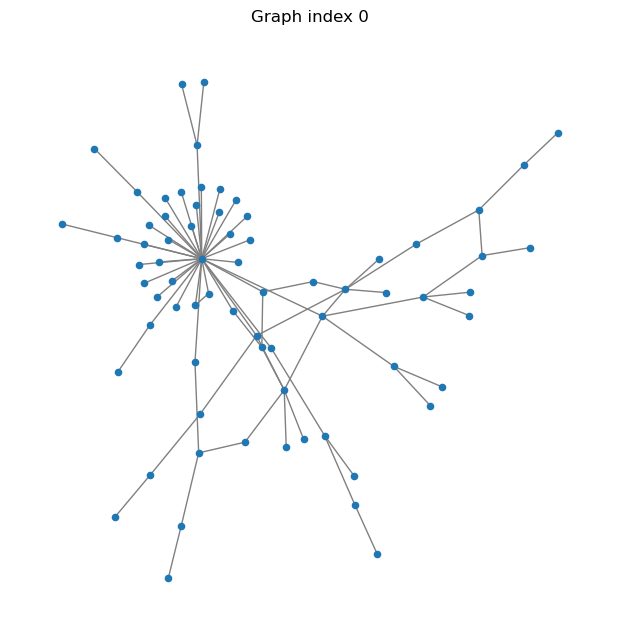

In [20]:
G  = nx.Graph()
G.add_edges_from(edges)

plt.figure(figsize=(6,6))
nx.draw(G , node_size = 20 , edge_color='gray')
plt.title('Graph index 0')
plt.show()

## Different presentations 

In [31]:
# Build graph 
def build_graph(edges):
    G= nx.Graph()
    G.add_edges_from(edges)
    return G

# Adjacency list
def adjacency_list(G):
    return {node:list(G.neighbors(node)) for node in G.nodes()}

# Adjacency matrix 
def adjacency_matrix(G):
    nodes = list(G.nodes())
    A = nx.to_numpy_array(G, nodelist=nodes, dtype=int)
    return A , nodes

# Incidence Matrix
def incidence_matrix(G):
    nodes = list(G.nodes())
    edges = list(G.edges())
    B = np.zeros((len(nodes), len(edges)), dtype=int)
    node_index = {node:i for i , node in enumerate(nodes)}
    for j , (u,v) in enumerate(edges):
        B[node_index[u], j]=1
        B[node_index[v], j]=-1
        
    return B , nodes , edges

In [32]:
#example 

def graph_representations(edges):
    G = build_graph(edges)

    adj_list = adjacency_list(G)
    A, nodes_A = adjacency_matrix(G)
    B, nodes_B, edges_B = incidence_matrix(G)


    return {
        "graph": G,
        "adjacency_list": adj_list,
        "adjacency_matrix": (A, nodes_A),
        "incidence_matrix": (B, nodes_B, edges_B)
    }


reprs = graph_representations(edges)

print("Adjacency list (sample):")
print(dict(list(reprs["adjacency_list"].items())[:5]))

print("\nAdjacency matrix shape:", reprs["adjacency_matrix"][0].shape)
print("Incidence matrix shape:", reprs["incidence_matrix"][0].shape)


Adjacency list (sample):
{0: [16], 16: [0, 1, 2, 3, 5, 7, 8, 11, 13, 64, 68, 70, 17, 18, 29, 32, 34, 35, 37, 38, 40, 41, 42, 43, 44, 45, 50, 52, 53, 55, 56, 57, 58, 60], 1: [16], 2: [16], 3: [16, 19]}

Adjacency matrix shape: (71, 71)
Incidence matrix shape: (71, 78)


## Structural & Centrality measures 
For global topology and to see the importance of nodes ! 

In [42]:
def structural_features(G):
    degrees = [d for _,d in G.degree()]
    features= {
        'num_nodes':G.number_of_nodes(),
        'num_edges':G.number_of_edges(),
        'density':nx.density(G),
        'avg_degree':np.mean(degrees),
        'max_degree':np.max(degrees),
        'avg_clustering':nx.average_clustering(G),
        'diameter':nx.diameter(G) if nx.is_connected(G) else np.nan
        
    }
    
    return features

In [46]:
def centrality_features(G):
     
    degree_c = list(nx.degree_centrality(G).values())
    betweenness_c = list(nx.betweenness_centrality(G).values())
    closeness_c = list(nx.closeness_centrality(G).values())
    eigenvector_c = list(nx.eigenvector_centrality(G, max_iter=5000,tol=1e-06).values())

    def summarize(x):
        return {
            "mean": np.mean(x),
            "std": np.std(x),
            "max": np.max(x)
        }

    features = {}

    for name, values in {
        "degree": degree_c,
        "betweenness": betweenness_c,
        "closeness": closeness_c,
        "eigenvector": eigenvector_c
    }.items():
        stats = summarize(values)
        for k, v in stats.items():
            features[f"{name}_{k}"] = v

    return features
    

In [47]:
def graph_features(edges):
    features = {}
    features.update(structural_features(edges))
    features.update(centrality_features(edges))
    return features


## Dataframe : structiral & centrality features 


In [48]:
rows = []

for graph_id, edges in edges_data.items():
    G = build_graph(edges)
    feats = graph_features(G)
    feats["graph_id"] = graph_id
    rows.append(feats)

df_features = pd.DataFrame(rows)
df_features.head()


,num_nodes,num_edges,density,avg_degree,max_degree,avg_clustering,diameter,degree_mean,degree_std,degree_max,betweenness_mean,betweenness_std,betweenness_max,closeness_mean,closeness_std,closeness_max,eigenvector_mean,eigenvector_std,eigenvector_max,graph_id
0,71,78,0.031388,2.197183,34,0.028194,10,0.031388,0.056720,0.485714,0.036999,0.107962,0.833264,0.296713,0.064079,0.507246,0.075463,0.091596,0.693533,0
1,137,203,0.021790,2.963504,25,0.041124,9,0.021790,0.027747,0.183824,0.020733,0.043830,0.262688,0.271360,0.046869,0.403561,0.054286,0.065972,0.364205,1
2,128,440,0.054134,6.875000,79,0.399363,6,0.054134,0.086787,0.622047,0.012644,0.049739,0.333260,0.399091,0.071191,0.641414,0.060556,0.064385,0.373922,2
3,99,173,0.035663,3.494949,59,0.257533,6,0.035663,0.063640,0.602041,0.017331,0.080611,0.789057,0.384696,0.067350,0.700000,0.070978,0.071156,0.618033,3
4,77,207,0.070745,5.376623,54,0.441852,5,0.070745,0.104836,0.710526,0.016692,0.071715,0.527156,0.454550,0.070163,0.767677,0.085937,0.074845,0.456700,4


In [4]:
#df_features.to_csv('graph_features.csv', index=False)
df_features = pd.read_csv('graph_features.csv')

Explore the dataframe 


In [5]:
df_features.columns 

Index(['num_nodes', 'num_edges', 'density', 'avg_degree', 'max_degree',
       'avg_clustering', 'diameter', 'degree_mean', 'degree_std', 'degree_max',
       'betweenness_mean', 'betweenness_std', 'betweenness_max',
       'closeness_mean', 'closeness_std', 'closeness_max', 'eigenvector_mean',
       'eigenvector_std', 'eigenvector_max', 'graph_id'],
      dtype='object')

In [6]:
df_features

,num_nodes,num_edges,density,avg_degree,max_degree,avg_clustering,diameter,degree_mean,degree_std,degree_max,betweenness_mean,betweenness_std,betweenness_max,closeness_mean,closeness_std,closeness_max,eigenvector_mean,eigenvector_std,eigenvector_max,graph_id
0,71,78,0.031388,2.197183,34,0.028194,10,0.031388,0.056720,0.485714,0.036999,0.107962,0.833264,0.296713,0.064079,0.507246,0.075463,0.091596,0.693533,0
1,137,203,0.021790,2.963504,25,0.041124,9,0.021790,0.027747,0.183824,0.020733,0.043830,0.262688,0.271360,0.046869,0.403561,0.054286,0.065972,0.364205,1
2,128,440,0.054134,6.875000,79,0.399363,6,0.054134,0.086787,0.622047,0.012644,0.049739,0.333260,0.399091,0.071191,0.641414,0.060556,0.064385,0.373922,2
3,99,173,0.035663,3.494949,59,0.257533,6,0.035663,0.063640,0.602041,0.017331,0.080611,0.789057,0.384696,0.067350,0.700000,0.070978,0.071156,0.618033,3
4,77,207,0.070745,5.376623,54,0.441852,5,0.070745,0.104836,0.710526,0.016692,0.071715,0.527156,0.454550,0.070163,0.767677,0.085937,0.074845,0.456700,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,51,83,0.065098,3.254902,45,0.421786,4,0.065098,0.126047,0.900000,0.022345,0.124147,0.893673,0.486779,0.074890,0.909091,0.110680,0.085777,0.615295,12720
12721,145,464,0.044444,6.400000,58,0.306411,5,0.044444,0.059529,0.402778,0.011364,0.034231,0.310022,0.389211,0.058427,0.623377,0.057516,0.059903,0.361599,12721
12722,97,106,0.022766,2.185567,89,0.082490,5,0.022766,0.092511,0.927083,0.011957,0.100359,0.993969,0.476302,0.062612,0.923077,0.077121,0.066042,0.702757,12722
12723,715,1219,0.004776,3.409790,123,0.084697,11,0.004776,0.009579,0.172269,0.004515,0.018395,0.323397,0.243852,0.039396,0.381614,0.017789,0.032896,0.513362,12723


In [9]:
df_features.describe()

,num_nodes,num_edges,density,avg_degree,max_degree,avg_clustering,diameter,degree_mean,degree_std,degree_max,betweenness_mean,betweenness_std,betweenness_max,closeness_mean,closeness_std,closeness_max,eigenvector_mean,eigenvector_std,eigenvector_max,graph_id
count,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000,12725.000000
mean,113.794735,234.638978,0.078124,3.197289,59.689273,0.191447,5.863104,0.078124,0.094996,0.576851,0.049965,0.120917,0.681335,0.396933,0.072315,0.662147,0.118807,0.094177,0.553743,6362.000000
std,164.010571,427.251342,0.059921,1.360192,92.092323,0.126934,1.954841,0.059921,0.050295,0.210434,0.045879,0.068430,0.202475,0.072662,0.018200,0.154966,0.067980,0.035487,0.103204,3673.535422
min,10.000000,9.000000,0.003139,1.800000,2.000000,0.000000,2.000000,0.003139,0.006234,0.072266,0.001408,0.010633,0.103866,0.154671,0.025517,0.229167,0.012593,0.024084,0.187025,0.000000
25%,24.000000,29.000000,0.028973,2.285714,12.000000,0.100833,4.000000,0.028973,0.054859,0.413793,0.014911,0.063487,0.525206,0.347166,0.059002,0.550000,0.061960,0.065708,0.477105,3181.000000
50%,47.000000,69.000000,0.067203,2.800000,26.000000,0.178620,6.000000,0.067203,0.091640,0.562500,0.035161,0.111261,0.690879,0.399436,0.070151,0.651515,0.109940,0.095842,0.561236,6362.000000
75%,123.000000,213.000000,0.110769,3.689655,59.000000,0.270303,7.000000,0.110769,0.126375,0.745731,0.072712,0.168413,0.856068,0.448727,0.082197,0.775281,0.161292,0.122356,0.645352,9543.000000
max,957.000000,4668.000000,0.561265,25.292308,755.000000,0.932556,18.000000,0.561265,0.283970,1.000000,0.333333,0.300000,1.000000,0.686310,0.157988,1.000000,0.305470,0.197781,0.707109,12724.000000


Visualisation

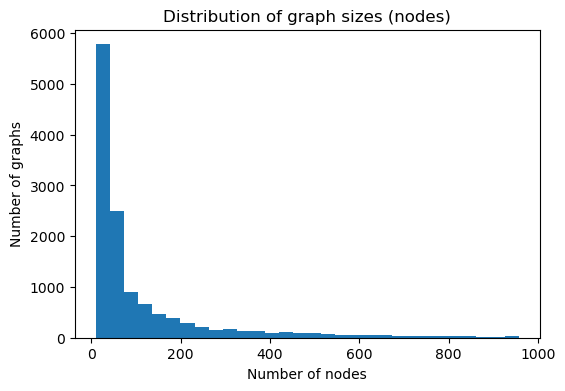

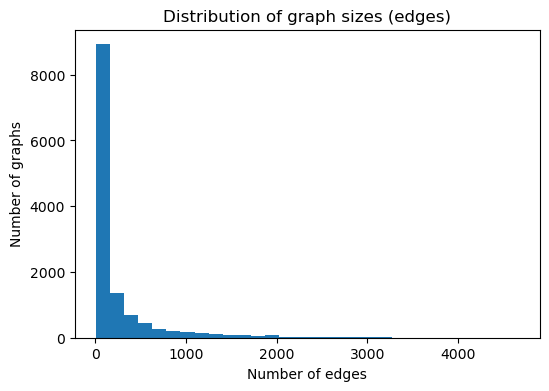

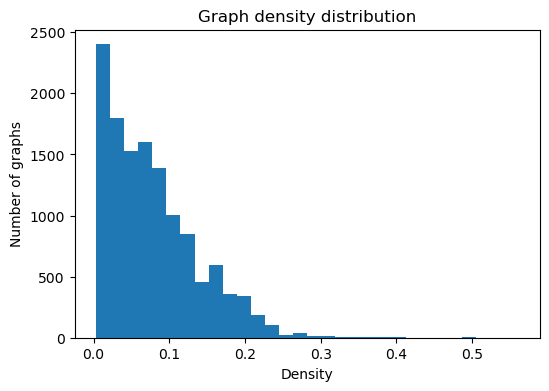

In [7]:
# Number of nodes 
plt.figure(figsize=(6,4))
plt.hist(df_features["num_nodes"], bins=30)
plt.xlabel("Number of nodes")
plt.ylabel("Number of graphs")
plt.title("Distribution of graph sizes (nodes)")
plt.show()

# Number of edges 
plt.figure(figsize=(6,4))
plt.hist(df_features["num_edges"], bins=30)
plt.xlabel("Number of edges")
plt.ylabel("Number of graphs")
plt.title("Distribution of graph sizes (edges)")
plt.show()

#Density distribution
plt.figure(figsize=(6,4))
plt.hist(df_features["density"], bins=30)
plt.xlabel("Density")
plt.ylabel("Number of graphs")
plt.title("Graph density distribution")
plt.show()



Merge with the target dataframe 

In [14]:
df = df_features.merge(df_target, left_on='graph_id', right_on='id', how='inner')

In [16]:
df.drop(columns=['id'])

,num_nodes,num_edges,density,avg_degree,max_degree,avg_clustering,diameter,degree_mean,degree_std,degree_max,...,betweenness_std,betweenness_max,closeness_mean,closeness_std,closeness_max,eigenvector_mean,eigenvector_std,eigenvector_max,graph_id,target
0,71,78,0.031388,2.197183,34,0.028194,10,0.031388,0.056720,0.485714,...,0.107962,0.833264,0.296713,0.064079,0.507246,0.075463,0.091596,0.693533,0,0
1,137,203,0.021790,2.963504,25,0.041124,9,0.021790,0.027747,0.183824,...,0.043830,0.262688,0.271360,0.046869,0.403561,0.054286,0.065972,0.364205,1,0
2,128,440,0.054134,6.875000,79,0.399363,6,0.054134,0.086787,0.622047,...,0.049739,0.333260,0.399091,0.071191,0.641414,0.060556,0.064385,0.373922,2,1
3,99,173,0.035663,3.494949,59,0.257533,6,0.035663,0.063640,0.602041,...,0.080611,0.789057,0.384696,0.067350,0.700000,0.070978,0.071156,0.618033,3,1
4,77,207,0.070745,5.376623,54,0.441852,5,0.070745,0.104836,0.710526,...,0.071715,0.527156,0.454550,0.070163,0.767677,0.085937,0.074845,0.456700,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,51,83,0.065098,3.254902,45,0.421786,4,0.065098,0.126047,0.900000,...,0.124147,0.893673,0.486779,0.074890,0.909091,0.110680,0.085777,0.615295,12720,0
12721,145,464,0.044444,6.400000,58,0.306411,5,0.044444,0.059529,0.402778,...,0.034231,0.310022,0.389211,0.058427,0.623377,0.057516,0.059903,0.361599,12721,1
12722,97,106,0.022766,2.185567,89,0.082490,5,0.022766,0.092511,0.927083,...,0.100359,0.993969,0.476302,0.062612,0.923077,0.077121,0.066042,0.702757,12722,1
12723,715,1219,0.004776,3.409790,123,0.084697,11,0.004776,0.009579,0.172269,...,0.018395,0.323397,0.243852,0.039396,0.381614,0.017789,0.032896,0.513362,12723,0


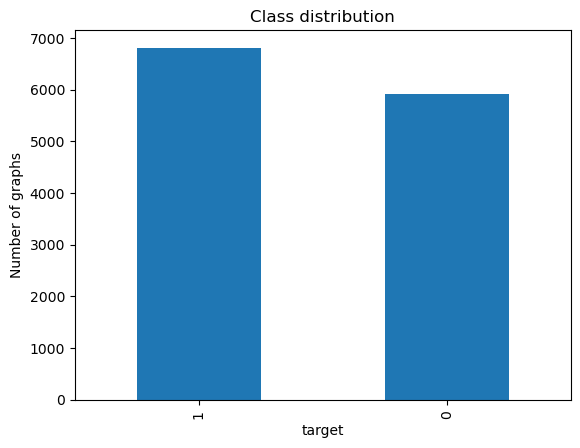

In [17]:
df["target"].value_counts().plot(kind="bar")
plt.ylabel("Number of graphs")
plt.title("Class distribution")
plt.show()


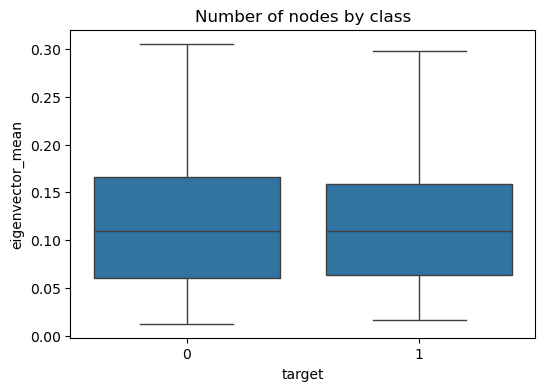

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="target", y="eigenvector_mean")
plt.title("Number of nodes by class")
plt.show()

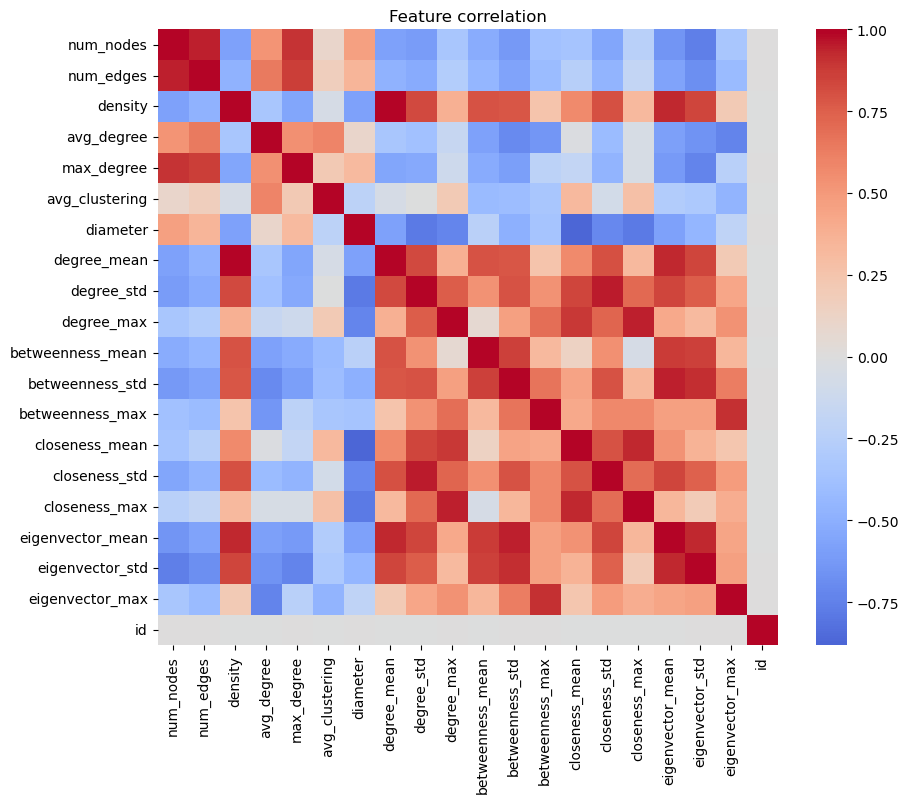

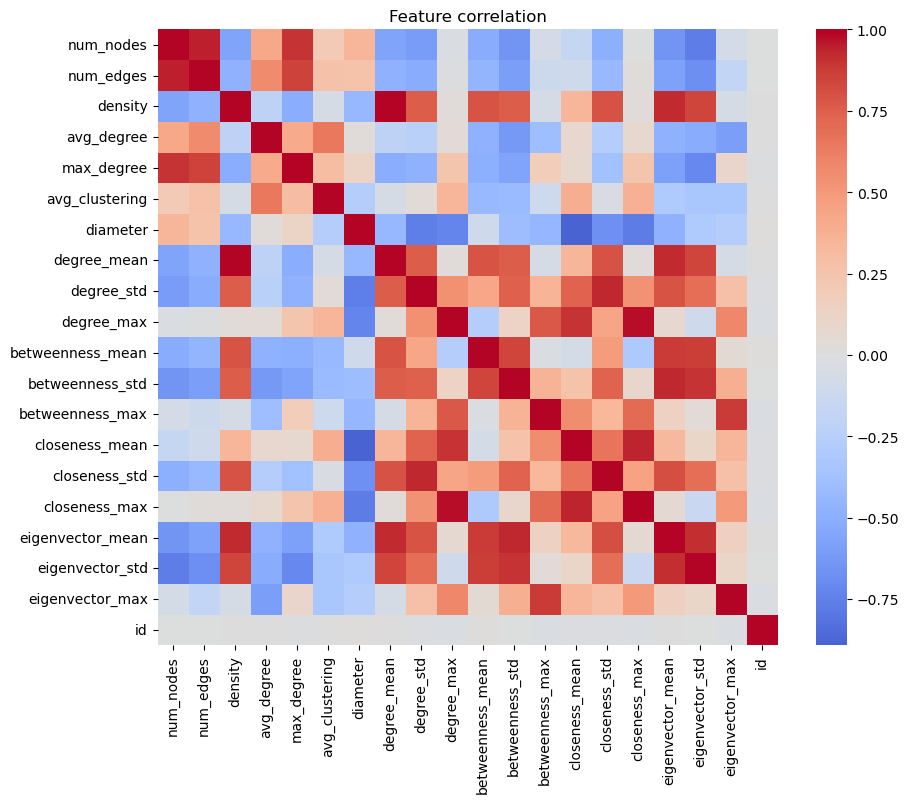

In [28]:
plt.figure(figsize=(10,8))
corr = df[df["target"] == 1].drop(columns=["graph_id", "target"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature correlation")
plt.show()

plt.figure(figsize=(10,8))
corr = df[df["target"] == 0].drop(columns=["graph_id", "target"]).corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Feature correlation")
plt.show()


## Embeddings 

In [33]:
graphs = []
graph_ids = []

for graph_id, edges in edges_data.items():
    G = build_graph(edges)
    graphs.append(G)
    graph_ids.append(graph_id)


In [40]:
print(graphs[1].edges)

[(0, 47), (47, 33), (47, 51), (47, 93), (1, 25), (1, 99), (1, 111), (99, 19), (99, 20), (99, 24), (99, 37), (99, 44), (99, 48), (99, 51), (99, 56), (111, 5), (111, 19), (111, 24), (111, 35), (111, 37), (111, 44), (111, 48), (111, 56), (111, 67), (111, 88), (111, 89), (111, 108), (111, 128), (111, 112), (111, 121), (2, 32), (2, 43), (2, 42), (2, 107), (32, 7), (32, 80), (32, 128), (32, 69), (32, 54), (32, 33), (32, 108), (43, 41), (43, 82), (42, 48), (42, 49), (42, 52), (42, 69), (42, 108), (42, 53), (42, 127), (107, 71), (3, 49), (3, 15), (4, 108), (4, 69), (108, 6), (108, 10), (108, 11), (108, 14), (108, 23), (108, 33), (108, 61), (108, 65), (108, 67), (108, 69), (108, 75), (108, 88), (108, 91), (108, 93), (108, 125), (69, 10), (69, 33), (69, 37), (69, 52), (69, 103), (69, 110), (69, 93), (69, 86), (6, 48), (48, 44), (48, 45), (48, 72), (48, 84), (48, 62), (48, 86), (48, 90), (48, 92), (48, 58), (48, 94), (8, 127), (8, 33), (8, 59), (8, 87), (127, 83), (33, 16), (33, 18), (33, 24), (3

#### Graph2Vec

In [43]:
!pip install karateclub --no-deps

Defaulting to user installation because normal site-packages is not writeable
  Using cached karateclub-1.3.3.tar.gz (64 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for karateclub: filename=karateclub-1.3.3-py3-none-any.whl size=101989 sha256=1d0fbe0217f383a1cf70bc70bbc44561f1f143db1c723536980ff0d1d5c337c5
  Stored in directory: c:\users\talae local\appdata\local\pip\cache\wheels\8c\59\5b\cec587a448c281393eeed3604826bc3e3460970d69b23f7fe4
Successfully built karateclub


In [47]:
!pip install python-louvain pygsp decorators python-igraph

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/1.9 MB ? eta -:--:--
   ---------------------- ----------------- 1.0/1.9 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------  1.8/1.9 MB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   --------- ------------------------------ 0.8/3.2 MB 4.8 MB/s eta 0:00:01
   -------------------------- ------------- 2.1/3.2 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 5.3 MB/s eta 0:00:00
  Created wheel for decorators: filename=decorators-2.0.7-py3-none-any.whl size=11553 sha256=1a1d9380ef0564a398ea4d16504bf0665233b1836f318cb33e03ebcc02b505de

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
karateclub 1.3.3 requires python-Levenshtein, which is not installed.
karateclub 1.3.3 requires decorator==4.4.2, but you have decorator 5.1.1 which is incompatible.
karateclub 1.3.3 requires networkx<2.7, but you have networkx 3.3 which is incompatible.
karateclub 1.3.3 requires numpy<1.23.0, but you have numpy 1.26.4 which is incompatible.
karateclub 1.3.3 requires pandas<=1.3.5, but you have pandas 2.2.2 which is incompatible.


In [48]:
from karateclub import Graph2Vec

In [50]:
graph2vec = Graph2Vec(
    dimensions=128,   # embedding size
    wl_iterations=2,  # Weisfeiler-Lehman steps
    epochs=10,
    learning_rate=0.025
)

graph2vec.fit(graphs)

In [51]:
embeddings = graph2vec.get_embedding()

In [52]:
embeddings.shape

(12725, 128)

In [53]:

df_embed = pd.DataFrame(
    embeddings,
    columns=[f"emb_{i}" for i in range(embeddings.shape[1])]
)

df_embed["graph_id"] = graph_ids

In [54]:
df_embed

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,...,emb_119,emb_120,emb_121,emb_122,emb_123,emb_124,emb_125,emb_126,emb_127,graph_id
0,0.169721,-0.083346,-0.326449,0.328129,0.316342,-0.106970,0.101786,0.323250,0.497913,-0.393854,...,0.013926,0.081853,-0.188025,0.219363,0.008626,-0.198013,-0.184394,0.064585,-0.123285,0
1,0.000269,-0.021925,-0.178748,0.426926,0.136754,-0.075958,0.230755,-0.079955,0.068633,0.023583,...,-0.074250,0.165756,-0.402003,0.334476,0.112421,-0.221451,0.122404,0.004736,-0.151372,1
2,-0.058313,-0.011971,-0.160437,0.159763,-0.045390,-0.169228,0.226547,-0.286175,0.148292,0.195735,...,-0.169122,0.243021,-0.323823,-0.140141,-0.201942,-0.043264,-0.034027,0.037088,-0.149072,2
3,0.020826,-0.113662,0.065360,0.103944,0.050466,0.140259,-0.007945,0.120733,0.027941,0.037807,...,-0.095514,0.094257,-0.298907,0.243637,-0.159455,-0.135019,-0.221104,-0.006922,-0.301722,3
4,0.006464,-0.083143,0.037794,-0.019192,0.238393,-0.251096,0.287290,-0.154451,0.152159,-0.033780,...,-0.217162,-0.108883,-0.015937,-0.093003,0.017135,0.108236,-0.000454,-0.147424,-0.516784,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720,-0.055152,-0.323532,-0.314468,-0.100453,0.066394,-0.281417,0.070875,0.133116,0.357145,-0.199292,...,-0.116937,0.120165,-0.086167,0.020983,0.114210,0.114249,0.003654,-0.029746,-0.360938,12720
12721,0.025991,0.004823,-0.123268,-0.020798,0.047175,-0.111085,-0.035276,-0.196098,0.071034,-0.039769,...,0.023862,-0.125136,-0.166722,0.192681,-0.057413,0.064651,-0.021728,-0.059757,-0.342767,12721
12722,0.622283,-0.409127,-0.131193,-0.118425,0.116187,-0.415361,0.486976,0.392126,0.739579,0.074890,...,-0.022263,-0.140079,-0.633656,0.229050,0.447467,-0.018741,0.488176,-0.023733,-0.293035,12722
12723,0.053201,-0.349110,0.074891,0.681874,0.911648,0.283126,0.274089,0.036135,0.795427,0.123333,...,-0.150640,0.881003,-1.073451,0.624168,0.030897,-0.169723,-0.070361,-0.045828,-0.906657,12723


In [55]:
df_embed.to_csv('embeddings_g2v.csv',index=False)